In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
np.random.seed(0)

import perc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get data

U_train shape: (3, 8000)
U_test shape: (3, 2000)


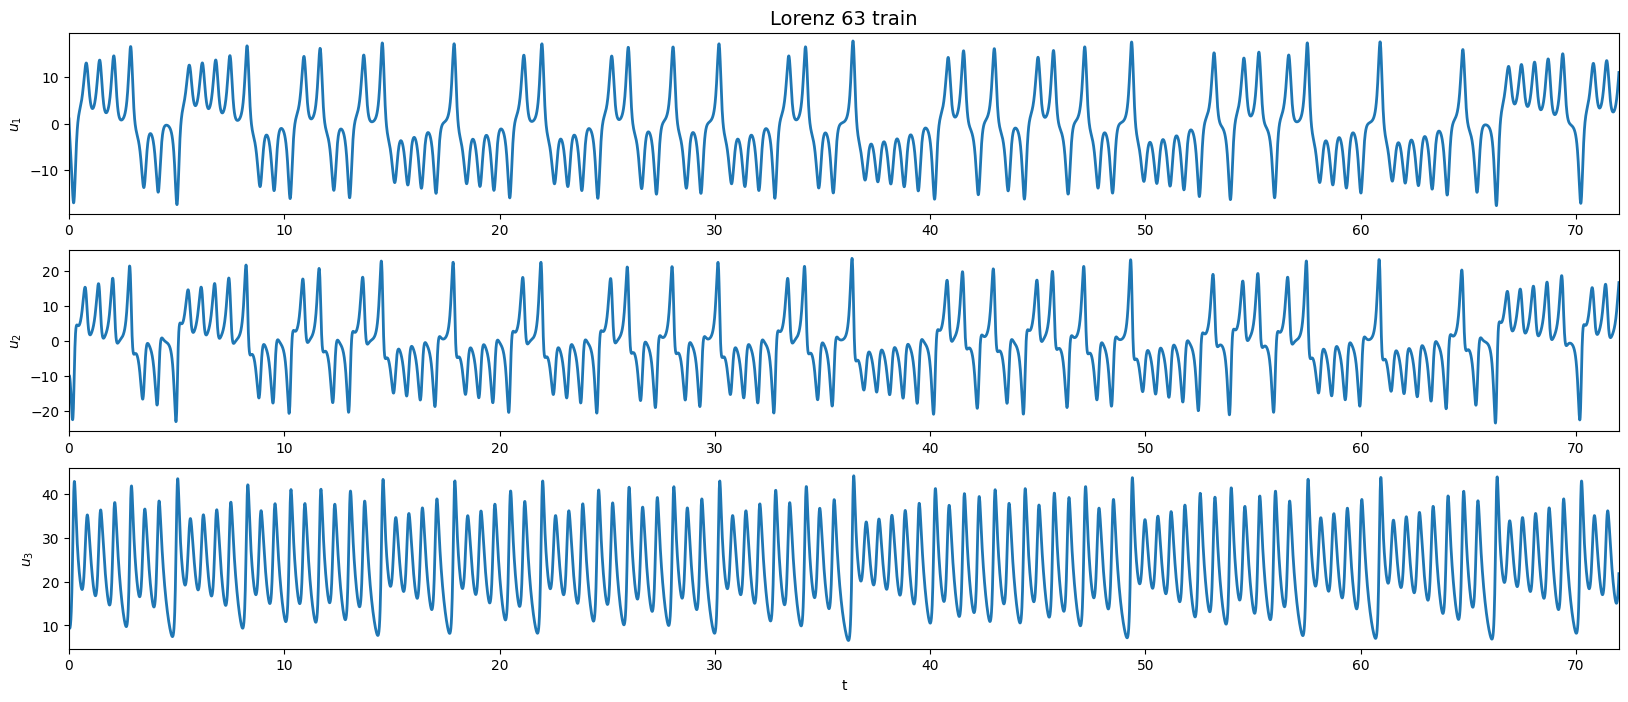

In [8]:
### Obtain + process data
LYAP = 0.9 # lyapunov exponent of lorenz 63
DT = 0.01 
TEST_PERC = 0.2 

# integrate lorenz 63
U,t = perc.integrators.lorentz63(
    x0 = [1,-10,10],
    dt = DT,
    t0 = 0,
    tN = 100
)

# train-test split
split_idx = int((1-TEST_PERC) * U.shape[1])
U_train = U[:, :split_idx]
U_test = U[:, split_idx:]
t_train = t[:split_idx] * LYAP
t_test = np.arange(U_test.shape[1]) * DT * LYAP # start from 0
print(f"U_train shape: {U_train.shape}")
print(f"U_test shape: {U_test.shape}")

# plot
perc.vis.plot_time_series(U_train,
                          t_train,
                          title="Lorenz 63 train",
                          labels=[r'$u_1$', r'$u_2$', r'$u_3$'],)

# Train and forecast

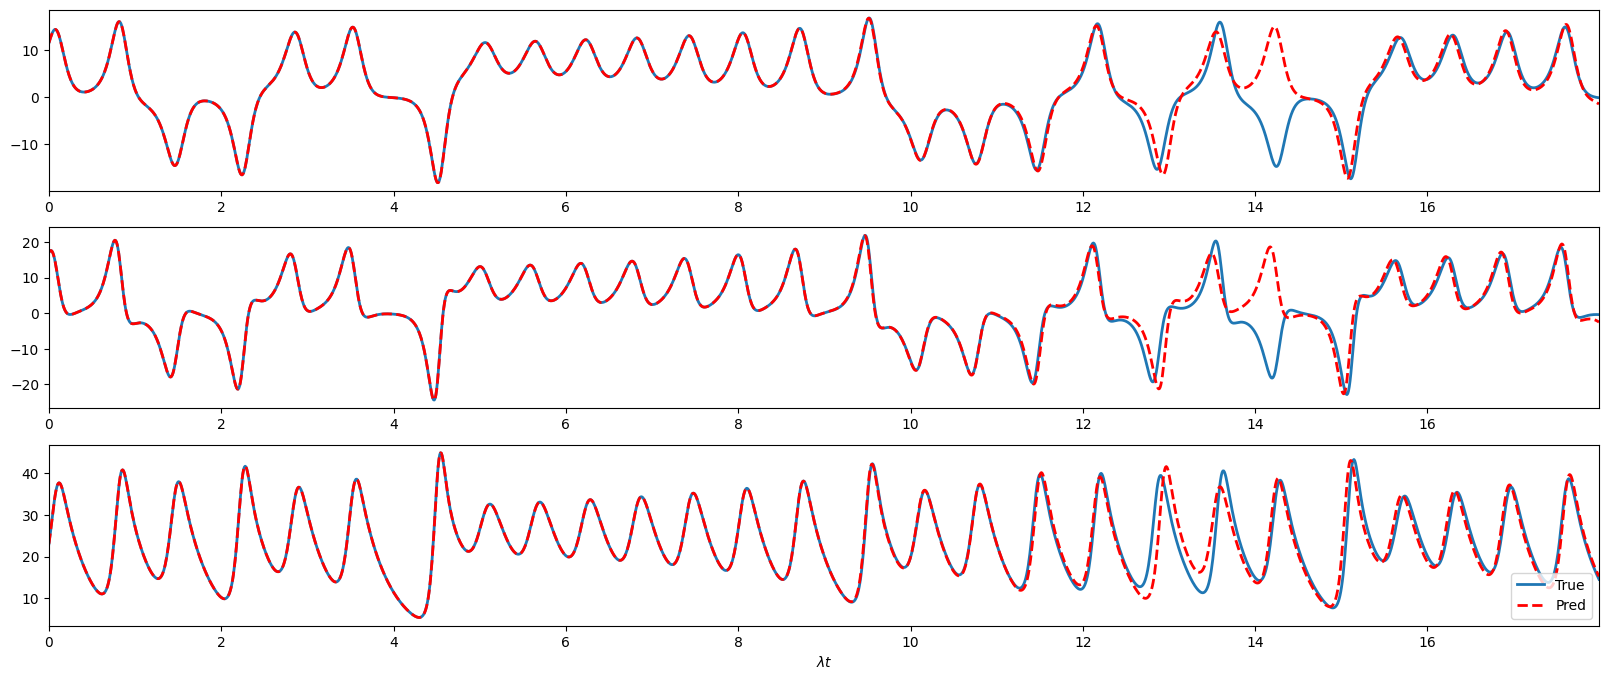

In [9]:
RC = perc.ReservoirComputer(Nu = U_train.shape[0])
_ = RC.train(U_train)
U_pred = RC.forecast(U_test.shape[1])

perc.vis.plot_time_series_pred(
    U_test,
    U_pred,
    t_test
)